In [1]:
import pandas as pd
df = pd.read_csv('../datasets/gabaeoh_data_from_hiDoc.csv')
df[:3]

,_id,question_title,question_content,question_date,question_tag,answer_title,answer_name,answer_belong,answer_content
0,64fece172822f039eb37dab3,강직성 척추염,선생님.\n\n강직성 척추염 환자의 90~95%에서 관련 유전자가 검출된다고 하셨는...,2016.03.18,"SMART TAG : 근골격계, 뼈, 정신/신경계, 내과, 류마티스내과, 강직성척추염",Re : 강직성 척추염,이정찬 [전문의],서울조인트내과의원,"안녕하세요, 하이닥 류마티스내과 상담의 이정찬 입니다.\n\n강직성 척추염의 증상이..."
1,64fece172822f039eb37dab4,척추골절 수술 문의드립니다.,60대 여성입니다.\n얼마전 허리상해로 mri 를 찍었는데\n병원 주치의 설명으로 ...,2023.05.23,"SMART TAG : 근골격계, 뼈, 척추, 정형외과, 재활의학과, 골절",Re : 척추골절 수술 문의드립니다.,이이호 [전문의],진주고려병원,질문자의 감사 인사 | 2023.05.23\n많은 도움이 되었습니다. 고맙습니다.
2,64fece172822f039eb37dab5,척추골절 수술 문의드립니다.,60대 여성입니다.\n얼마전 허리상해로 mri 를 찍었는데\n병원 주치의 설명으로 ...,2023.05.23,"SMART TAG : 근골격계, 뼈, 척추, 정형외과, 재활의학과, 골절",Re : 척추골절 수술 문의드립니다.,이이호 [전문의],진주고려병원,질문자의 감사 인사 | 2023.05.23\n많은 도움이 되었습니다. 고맙습니다.


In [2]:
df_question = df[['question_content', 'question_date','question_tag']]

In [3]:
df_question.to_excel('../datasets/select_colums.xlsx')

## 전처리 

### 결측치 처리

In [4]:
df_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   question_content  10283 non-null  object
 1   question_date     10570 non-null  object
 2   question_tag      10561 non-null  object
dtypes: object(3)
memory usage: 247.9+ KB


In [5]:
df_question = df_question.dropna()
df_question.isnull().sum()

question_content    0
question_date       0
question_tag        0
dtype: int64

### 자연어 처리 
- 불용어 처리 
- 한글자 처리 

In [6]:
df_stop_words = pd.read_excel('../datasets/stop_words.xlsx')
df_stop_words[:5]

,불용어 리스트(stop word)
0,가
1,가까스로
2,가령
3,각
4,각각


In [7]:
#!pip install python-mecab-ko pyLDAvis

In [8]:
from mecab import MeCab
mecab = MeCab()

In [9]:
stopwords = df_stop_words['불용어 리스트(stop word)'].values
def tokenizer(raw, stopword=stopwords):
    result_list = list()
    for word in mecab.nouns(raw) :
        if len(word) > 1 and word not in stopword :
            result_list.append(word)
    return ' '.join(result_list) # return str

In [10]:
mecab.nouns('아무곳에서나 보고 억지로라도 운동할수 있어서 너무 좋습니다. 감사히 잘 쓸께요.')

['곳', '운동', '수']

In [11]:
# 형태 분석기 적용된 함수 실행
tokenizer('아무곳에서나 보고 억지로라도 운동할수 있어서 너무 좋습니다. 감사히 잘 쓸께요.')

'운동'

In [12]:
df_question['tokenized_content']= df_question['question_content'].apply(tokenizer)
df_question[:2]

,question_content,question_date,question_tag,tokenized_content
0,선생님.\n\n강직성 척추염 환자의 90~95%에서 관련 유전자가 검출된다고 하셨는...,2016.03.18,"SMART TAG : 근골격계, 뼈, 정신/신경계, 내과, 류마티스내과, 강직성척추염",선생 강직 척추염 환자 관련 유전자 검출 유전자 검출 사람 정상 확률 증상 경우 척...
1,60대 여성입니다.\n얼마전 허리상해로 mri 를 찍었는데\n병원 주치의 설명으로 ...,2023.05.23,"SMART TAG : 근골격계, 뼈, 척추, 정형외과, 재활의학과, 골절",여성 허리 병원 주치 설명 군데 골절 흉추 군데 요추 군데 압박 골절 통증 척추 성...


## 부정과 긍정 댓글 분리 

In [13]:
#!pip install wordcloud

In [14]:
from wordcloud import WordCloud

In [23]:
sentences_before = list(df_question['question_content']) # 전처리 전 
sentences_after = list(df_question['tokenized_content']) # 전처리 후 

In [24]:
text_before = ' '.join(sentences_before) # 전처리 전
text_after = ' '.join(sentences_after) # 전처리 후 

In [ ]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud_before = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(text)

In [25]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud_before = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud_before.generate_from_text(text_before)

In [26]:
wordCloud_before.words_ 

{'n n': 1.0,
 '있습니다 n': 0.27624576681180457,
 'n n2': 0.22641509433962265,
 '궁금합니다 n': 0.2181906144170295,
 'n n1': 0.21770682148040638,
 '합니다 n': 0.21528785679729076,
 'n n제가': 0.20706337687469764,
 '수 있나요': 0.20319303338171263,
 'n n3': 0.1490082244799226,
 'n n그런데': 0.14755684567005323,
 '있나요 n': 0.1470730527334301,
 'n n그리고': 0.14610546686018383,
 '통증이 있습니다': 0.14271891630382197,
 '척추 신경이': 0.13933236574746008,
 '허리 통증이': 0.13836477987421383,
 '진단을 받았습니다': 0.1223996129656507,
 '하고 있습니다': 0.11901306240928883,
 '수 있을까요': 0.11223996129656506,
 '것 같습니다': 0.10353168843734882,
 '수 있는': 0.10256410256410256,
 '안녕하세요 n': 0.10062893081761007,
 '바로 옆': 0.09966134494436381,
 '강직성 척추염': 0.09724238026124818,
 '받았습니다 n': 0.09579100145137881,
 '도움이 될까요': 0.09337203676826318,
 'n n현재': 0.09288824383164006,
 '통증이 있고': 0.08756652152878568,
 '허리를 숙이면': 0.08611514271891631,
 '어떻게 해야': 0.08369617803580068,
 '없습니다 n': 0.08127721335268505,
 '강직성 척추염을': 0.07885824866956942,
 '뱃살이 너무': 0.0783744557329463,
 

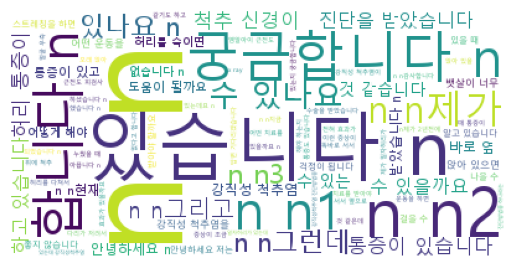

In [30]:
# 데이터 전처리 전
import matplotlib.pyplot as plt
plt.imshow(wordCloud_before)
plt.axis('off') 
plt.show()

In [20]:
#%matplotlib tk
%matplotlib inline 

In [28]:
wordCloud_after = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud_after.generate_from_text(text_after)

In [29]:
wordCloud_after.words_ 

{'허리 통증': 1.0,
 '강직 척추염': 0.7566735112936345,
 '척추 분리': 0.6083162217659137,
 '척추관 협착증': 0.4753593429158111,
 '압박 골절': 0.4471252566735113,
 '허리 디스크': 0.3896303901437372,
 '의사 선생': 0.364476386036961,
 '전방 위증': 0.3413757700205339,
 '척추 전방': 0.3069815195071869,
 '물리 치료': 0.3008213552361396,
 '통증 통증': 0.263347022587269,
 '왼쪽 다리': 0.26283367556468173,
 '대학 병원': 0.25205338809034905,
 '일상 생활': 0.25051334702258726,
 '통증 허리': 0.24794661190965092,
 '척추 신경': 0.24178644763860369,
 '수술 수술': 0.24075975359342916,
 '허리 허리': 0.2402464065708419,
 '척추 협착증': 0.22946611909650924,
 '병원 척추': 0.22433264887063656,
 '수술 허리': 0.22279260780287474,
 '검사 결과': 0.21509240246406572,
 '전문 병원': 0.19969199178644764,
 '도수 치료': 0.19917864476386038,
 '약물 치료': 0.19558521560574949,
 '답변 부탁': 0.19250513347022588,
 '척추 골반': 0.1919917864476386,
 '협착증 수술': 0.1837782340862423,
 '분리 증이': 0.17813141683778233,
 '운동 운동': 0.1688911704312115,
 '통증 발생': 0.1673511293634497,
 '척추 마취': 0.1658110882956879,
 '답변 감사': 0.16427104722792607,
 '치료 

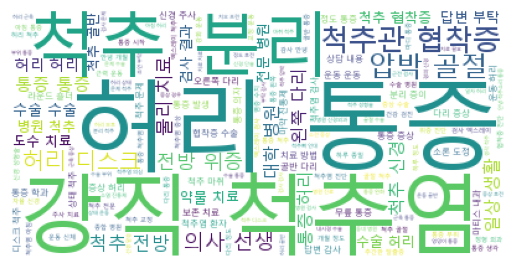

In [31]:
# 데이터 전처리 후
import matplotlib.pyplot as plt
plt.imshow(wordCloud_after)
plt.axis('off') 
plt.show()